In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rnd
import pandas as pd

"""
rbf_nodes: Number of RBF nodes
sigmaW: Standard deviation for initialisation of weights
eta: Learning rate
epochs: Number of epochs
variance_value: Variance of the RBFs
rbf_noise: Adding noise to RBF placements so that they are not uniformly distributed between [0, 2pi]
data_noise: Adding nosie to data for 3.2

"""

"""
To change from 3.1 to 3.2, change between the variables 
"patterns" -> "patterns_noise" 
in the first parameter under the comment block "least squares train" and 
"test_patterns" -> "test_patterns_noise" 
in the first parameter under the comment block "least square test"


"""

"""
In the least squares equation tranpose(PHI) * PHI * w = transpose(PHI) * f, I have changed
tranpose(PHI) * PHI -> A and transpose(PHI) * f -> B so that
w = A^{-1} * B. 

"""

"""
The following parameter values are fixed:
step, data_noise

The following paramters are not fixed:
rbf_nodes, sigmaW, eta, epochs, variance_value, rbf_noise

"""

#first part
def distance(x, w):
    return [np.abs(x-y) for y in w]

rbf_nodes, sigmaW, eta, epochs, variance_value = 10, 5, 0.01, 1000, 1

rbf_noise, data_noise = 0.2, math.sqrt(0.1)

# limit to [0, 2pi]
step = 0.1                                                                             
limit_x = int(2 * math.pi / step)
patterns = [i * step for i in range(limit_x)]
targets_sin_train = sin(patterns)
rbf_placements_x = [(limit_x + 1) / rbf_nodes * i * step for i in range(rbf_nodes)]

# placing rbfs uniformly with noise
for i in range(len(rbf_placements_x)):
    if rnd.randint(0, 1) == 1:
        rbf_placements_x[i] += rbf_noise
    else:
        rbf_placements_x[i] -= rbf_noise

# initialize weights for delta_rule
weights_delta = weights_init(rbf_nodes, sigmaW)

# variance or width of the kernels
rbf_variance = [variance_value for i in range(rbf_nodes)]

# test patterns
test_patterns = [0.05 + i * step for i in range(limit_x)]
targets_sin_test = sin(test_patterns)

# add noise to data
patterns_noise = patterns.copy()
test_patterns_noise = test_patterns.copy()
patterns_noise = add_data_noise(patterns_noise, data_noise)
test_patterns_noise = add_data_noise(test_patterns_noise, data_noise)




1.038983264745229 error on sin(2x) DR train
0.8929876081501176 error on sin(2x) DR train layer
0.5199058250455393 error on sin(2x) DR test
1.540612971707415 error on sin(2x) DR test layer


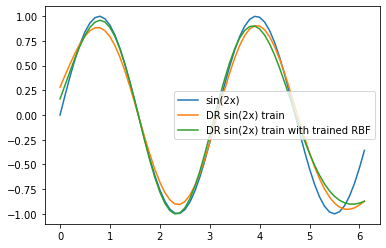

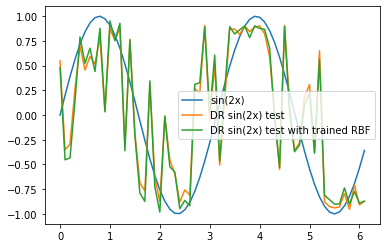

In [49]:
# train without noise
rbf_placements_x_train = rbf_placements_x.copy()
for i in range(epochs):
  orderSamples = np.random.permutation(len(patterns)) 
  for j in range(len(orderSamples)):
      distances = distance(patterns[j], rbf_placements_x_train)
      position = distances.index(min(distances))
      rbf_placements_x_train[position] = rbf_placements_x_train[position] + eta * (patterns[j]-rbf_placements_x_train[position])

targets_sin_train = sin(patterns)
weights_delta_sin_train = weights_delta.copy()
weights_delta_sin_train_layer = weights_delta.copy()
phi_train = rbf(patterns, rbf_placements_x, rbf_variance)
phi_train_layer = rbf(patterns, rbf_placements_x_train, rbf_variance)

for i in range(epochs):
  # random permutation
  permutation = np.random.permutation(len(patterns))
  
  # delta rule for sin train
  weights_delta_sin_train = delta_rule(phi_train, targets_sin_train, weights_delta_sin_train, permutation, eta)
  err_delta_sin_train = np.sum(np.square(np.dot(phi_train, weights_delta_sin_train) - targets_sin_train))

  weights_delta_sin_train_layer = delta_rule(phi_train_layer, targets_sin_train, weights_delta_sin_train_layer, permutation, eta)
  err_delta_sin_train_layer = np.sum(np.square(np.dot(phi_train_layer, weights_delta_sin_train_layer) - targets_sin_train))

print(err_delta_sin_train, "error on sin(2x) DR train")
print(err_delta_sin_train_layer, "error on sin(2x) DR train layer")


# Test
phi_test = rbf(test_patterns_noise, rbf_placements_x, rbf_variance)
phi_test_layer = rbf(test_patterns_noise, rbf_placements_x_train, rbf_variance)
err_delta_sin_test = rmse(np.sum(np.square(np.dot(phi_test, weights_delta_sin_train) - targets_sin_test)), len(targets_sin_train))
err_delta_sin_test_layer = rmse(np.sum(np.square(np.dot(phi_test, weights_delta_sin_train_layer) - targets_sin_test)), len(targets_sin_train))

print(err_delta_sin_test, "error on sin(2x) DR test")
print(err_delta_sin_test_layer, "error on sin(2x) DR test layer")

plt.figure()
plt.plot(patterns, targets_sin_train, label="sin(2x)")
plt.plot(patterns, np.dot(phi_train, weights_delta_sin_train), label="DR sin(2x) train")
plt.plot(patterns, np.dot(phi_train_layer, weights_delta_sin_train_layer), label="DR sin(2x) train with trained RBF")
plt.legend()
plt.show()

plt.figure()
plt.plot(patterns, targets_sin_train, label="sin(2x)")
plt.plot(patterns, np.dot(phi_test, weights_delta_sin_train), label="DR sin(2x) test")
plt.plot(patterns, np.dot(phi_test_layer, weights_delta_sin_train_layer), label="DR sin(2x) test with trained RBF")
plt.legend()
plt.show()


14.351932302158321 error on sin(2x) DR train
14.05570256564826 error on sin(2x) DR train layer
0.5510792544306871 error on sin(2x) DR test
1.3619178312548668 error on sin(2x) DR test layer


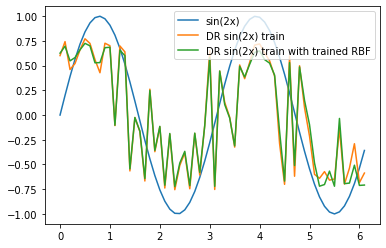

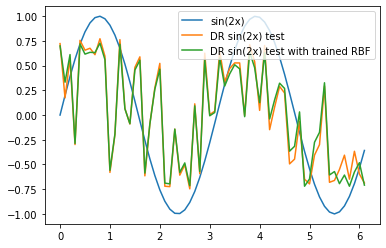

In [56]:
# train with noise
rbf_placements_x_train = rbf_placements_x.copy()
for i in range(epochs):
  orderSamples = np.random.permutation(len(patterns_noise)) 
  for j in range(len(orderSamples)):
      distances = distance(patterns_noise[j], rbf_placements_x_train)
      position = distances.index(min(distances))
      rbf_placements_x_train[position] = rbf_placements_x_train[position] + eta * (patterns_noise[j]-rbf_placements_x_train[position])

targets_sin_train = sin(patterns)
weights_delta_sin_train = weights_delta.copy()
weights_delta_sin_train_layer = weights_delta.copy()
phi_train = rbf(patterns_noise, rbf_placements_x, rbf_variance)
phi_train_layer = rbf(patterns_noise, rbf_placements_x_train, rbf_variance)

for i in range(epochs):
  # random permutation
  permutation = np.random.permutation(len(patterns_noise))

  # delta rule for sin train
  weights_delta_sin_train = delta_rule(phi_train, targets_sin_train, weights_delta_sin_train, permutation, eta)
  err_delta_sin_train = np.sum(np.square(np.dot(phi_train, weights_delta_sin_train) - targets_sin_train))

  weights_delta_sin_train_layer = delta_rule(phi_train_layer, targets_sin_train, weights_delta_sin_train_layer, permutation, eta)
  err_delta_sin_train_layer = np.sum(np.square(np.dot(phi_train_layer, weights_delta_sin_train_layer) - targets_sin_train))

print(err_delta_sin_train, "error on sin(2x) DR train")
print(err_delta_sin_train_layer, "error on sin(2x) DR train layer")


# Test
phi_test = rbf(test_patterns_noise, rbf_placements_x, rbf_variance)
phi_test_layer = rbf(test_patterns_noise, rbf_placements_x_train, rbf_variance)
err_delta_sin_test = rmse(np.sum(np.square(np.dot(phi_test, weights_delta_sin_train) - targets_sin_test)), len(targets_sin_train))
err_delta_sin_test_layer = rmse(np.sum(np.square(np.dot(phi_test, weights_delta_sin_train_layer) - targets_sin_test)), len(targets_sin_train))

print(err_delta_sin_test, "error on sin(2x) DR test")
print(err_delta_sin_test_layer, "error on sin(2x) DR test layer")

plt.figure()
plt.plot(patterns, targets_sin_train, label="sin(2x)")
plt.plot(patterns, np.dot(phi_train, weights_delta_sin_train), label="DR sin(2x) train")
plt.plot(patterns, np.dot(phi_train_layer, weights_delta_sin_train_layer), label="DR sin(2x) train with trained RBF")
plt.legend()
plt.show()

plt.figure()
plt.plot(patterns, targets_sin_train, label="sin(2x)")
plt.plot(patterns, np.dot(phi_test, weights_delta_sin_train), label="DR sin(2x) test")
plt.plot(patterns, np.dot(phi_test_layer, weights_delta_sin_train_layer), label="DR sin(2x) test with trained RBF")
plt.legend()
plt.show()


[1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0, 5.1000000000000005, 5.2, 5.300000000000001, 5.4, 5.5, 5.6000000000000005, 5.7, 5.800000000000001, 5.9, 6.0, 6.1000000000000005, 6.2, 6.300000000000001, 6.4, 6.5, 6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0]
[0.0, 0.63, 1.26, 1.89, 2.52, 3.1500000000000004, 3.78, 4.41, 5.04, 5.67]
[0.0, 0.63, 1.5020099791940003, 2.002009979194003, 2.55293116538224, 3.2040197959889856, 3.9552758490301096, 4.755275849030096, 5.606699299143541, 6.558290117591223]
[1.4759642626602802, 1.8017662909863241, 2.177479509059302, 2.615535049848014, 3.117399338329793, 3.6807440066539754, 4.319508080551783, 5.02126

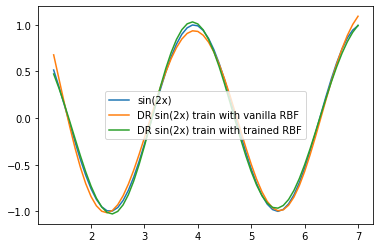

In [46]:
#second part
#change h depending on epochs
constant = 0.1
patterns = [(i+13) * step for i in range(limit_x-4)]
print(patterns)
rbf_placements_x = [(limit_x + 1) / rbf_nodes * i * step for i in range(rbf_nodes)]
rbf_placements_x_vanilla = rbf_placements_x.copy()
rbf_placements_x_DU = rbf_placements_x.copy()
targets_sin_train = sin(patterns)

weights_delta_sin_vanilla = weights_delta.copy()
weights_delta_sin_DU = weights_delta.copy()

for i in range(epochs):
    orderSamples = np.random.permutation(len(patterns))
    for j in range(len(orderSamples)):
      distances = distance(patterns[j], rbf_placements_x_vanilla)
      position = distances.index(min(distances))
      rbf_placements_x_vanilla[position] = rbf_placements_x_vanilla[position] + eta * (patterns[j]-rbf_placements_x_vanilla[position])
    for j in range(len(orderSamples)):
        distances = distance(patterns[j], rbf_placements_x_DU)
        position = distances.index(min(distances))
        rbf_placements_x_DU[position] = rbf_placements_x_DU[position] + eta * (patterns[j]-rbf_placements_x_DU[position])
        if (position>0):
            rbf_placements_x_DU[position-1] = rbf_placements_x_DU[position-1] + constant * eta * (patterns[j]-rbf_placements_x_DU[position-1])
        if(position<len(rbf_placements_x)-1):
            rbf_placements_x_DU[position+1] = rbf_placements_x_DU[position+1] + constant * eta * (patterns[j]-rbf_placements_x_DU[position+1])

phi_train_vanilla = rbf(patterns, rbf_placements_x_vanilla, rbf_variance)
phi_train_DU = rbf(patterns, rbf_placements_x_DU, rbf_variance)

print(rbf_placements_x)
print(rbf_placements_x_vanilla)
print(rbf_placements_x_DU)

targets_sin_train = sin(patterns)

for i in range(epochs):
  # random permutation
  permutation = np.random.permutation(len(patterns))

  # delta rule for sin train
  weights_delta_sin_vanilla = delta_rule(phi_train_vanilla, targets_sin_train, weights_delta_sin_vanilla, permutation, eta)
  err_delta_sin_vanilla = np.sum(np.square(np.dot(phi_train_vanilla, weights_delta_sin_vanilla) - targets_sin_train))

  weights_delta_sin_DU = delta_rule(phi_train_DU, targets_sin_train, weights_delta_sin_DU, permutation, eta)
  err_delta_sin_DU = np.sum(np.square(np.dot(phi_train_DU, weights_delta_sin_DU) - targets_sin_train))

print(err_delta_sin_vanilla, "error on sin(2x) vanilla")
print(err_delta_sin_DU, "error on sin(2x) DU")

plt.figure()
plt.plot(patterns, targets_sin_train, label="sin(2x)")
plt.plot(patterns, np.dot(phi_train_vanilla, weights_delta_sin_vanilla), label="DR sin(2x) train with vanilla RBF")
plt.plot(patterns, np.dot(phi_train_DU, weights_delta_sin_DU), label="DR sin(2x) train with trained RBF")



plt.legend()

plt.show()



100
Initial RBF [[0.983 0.85  0.803 0.661 0.605 0.594 0.205]
 [0.251 0.019 0.466 0.62  0.585 0.79  0.38 ]]
17.34896347290025
26.36476293786099


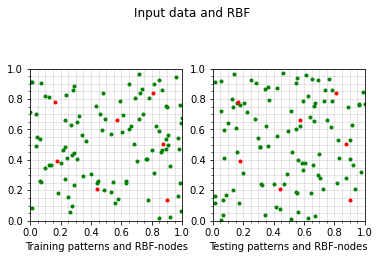

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rnd
import pandas as pd
#third part, important to save the data_lab2 folder in the same folder as the code

#around 7 nodes pm 1 maybe
rbf_nodes, sigmaW, eta, epochs, rbf_variance = 7, 5, 0.001, 1000, 0.3
# extract data
df1 = pd.read_table("/content/ballist.dat", header=None)
training1 = df1.iloc[:, 0]
training2 = df1.iloc[:, 1]
df2 = pd.read_table("/content/balltest.dat", header=None)
testing1 = df2.iloc[:, 0]
testing2 = df2.iloc[:, 1]
training_patterns, training_targets, testing_patterns, testing_targets = [], [], [], []
for i in range(100):
    training_patterns.append(list(map(float, training1[i].split(' '))))
    testing_patterns.append(list(map(float, testing1[i].split(' '))))
    training_targets.append(list(map(float, training2[i].split(' '))))
    testing_targets.append(list(map(float, testing2[i].split(' '))))
training_patterns=np.transpose(training_patterns)
testing_patterns=np.transpose(testing_patterns)
training_targets=np.transpose(training_targets)
testing_targets=np.transpose(testing_targets)

#initialize RBF layer
rbf_placements = []
orderSamples = np.random.permutation(np.shape(training_patterns)[1]) 
#print(training_patterns)
print(np.shape(training_patterns)[1])
for i in range(rbf_nodes):
  rbf_placements.append(training_patterns[:,orderSamples[i]-1])
rbf_placements=np.transpose(rbf_placements)
print("Initial RBF", rbf_placements)

# train RBF layer
for i in range(epochs):
  orderSamples = np.random.permutation(np.shape(training_patterns)[1]) 
  for j in range(len(orderSamples)):
    distances = []
    for k in range(rbf_nodes):
      distances.append(np.linalg.norm(training_patterns[:,j]- rbf_placements[:,k]))
    position = distances.index(min(distances))
    rbf_placements[:,position] = rbf_placements[:,position] + eta * (training_patterns[:,j]-rbf_placements[:,position])
    
# train with delta rule
weights = np.reshape(weights_init(2*rbf_nodes, sigmaW), (2, -1))
phi_train = rbf2(training_patterns, rbf_placements, rbf_variance)
phi_test = rbf2(testing_patterns, rbf_placements, rbf_variance)

for i in range(epochs):
  # random permutation
  permutation = np.random.permutation(np.shape(training_patterns)[1])
  weights = delta_rule2(phi_train, training_targets, weights, permutation, eta)

#test 
error= np.sum(np.square(np.transpose(np.dot(phi_test, np.transpose(weights))) - testing_targets))
print(error)
# error training
print(np.sum(np.square(np.transpose(np.dot(phi_train, np.transpose(weights))) - training_targets)))

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.suptitle('Input data and RBF')

# Plot 1 training patterns
ax1.set(xlim=(0.0, 1.0), ylim=(0.0, 1.0))
x_ticks = np.arange(0.0, 1.0, 0.05)
y_ticks = np.arange(0.0, 1.0, 0.05)
ax1.set_xticks(np.arange(0.0, 1.0, 0.05), minor=True)
ax1.set_yticks(np.arange(0.0, 1.0, 0.05), minor=True)
ax1.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)


ax1.plot(training_patterns[0], training_patterns[1], '.', color="green")
ax1.plot(rbf_placements[0], rbf_placements[1], '.', color="red")
ax1.set_aspect(1.0/ax1.get_data_ratio(), adjustable='box')
ax1.set_xlabel('Training patterns and RBF-nodes')

# Plot 1 testing patterns
ax2.set(xlim=(0.0, 1.0), ylim=(0.0, 1.0))
x_ticks = np.arange(0.0, 1.0, 0.05)
y_ticks = np.arange(0.0, 1.0, 0.05)
ax2.set_xticks(np.arange(0.0, 1.0, 0.05), minor=True)
ax2.set_yticks(np.arange(0.0, 1.0, 0.05), minor=True)
ax2.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)


ax2.plot(testing_patterns[0], testing_patterns[1], '.', color="green")
ax2.plot(rbf_placements[0], rbf_placements[1], '.', color="red")
ax2.set_aspect(1.0/ax1.get_data_ratio(), adjustable='box')
ax2.set_xlabel('Testing patterns and RBF-nodes')
plt.show()

In [15]:
def sin(x):
    targets = []
    for i in x:
        targets.append(math.sin(2 * i))
    return targets

In [16]:
def rbf(x, rbf, variance):
    phi = []
    for j in range(len(x)):
        phi.append([])
        for i in range(len(rbf)):
            phi[j].append(np.exp(-((x[j] - rbf[i]) ** 2) / (2 * variance[i])))
    return phi

In [6]:
def weights_init(rbf_nodes, sigmaW):
  weights = np.random.standard_normal(rbf_nodes) * sigmaW
  return weights


In [4]:
def add_data_noise(data, variance):
  for i in range(len(data)):
    noise = np.random.normal(0, math.sqrt(variance))
    data[i] += noise
  return data

In [3]:
def delta_rule(phi, targets, weights, permutation, eta):
  for i in permutation:
    error = (targets[i] - np.dot(np.transpose(phi[i]), weights))
    weights += eta * error * np.array(phi[i])
  return weights

In [2]:
def rbf2(x, rbf, variance):
  phi = []
  for j in range(np.shape(x)[1]):
      phi.append([])
      for i in range(np.shape(rbf)[1]):
        phi[j].append(np.exp(-(np.linalg.norm(x[:,j]-rbf[:,i])) / (2 * variance)))
  return phi

In [1]:
def delta_rule2(phi, targets, weights, permutation, eta):
  for i in permutation:
    error = (targets[:,i] - np.dot(phi[i], np.transpose(weights)))
    weights += np.vstack((eta * error[0] * np.array(phi[i]), eta * error[1] * np.array(phi[i])))
  return weights

In [31]:
def rmse(tot_err, n):
    return math.sqrt(tot_err/n)